🖼️ 1. Original
* What it does: Displays the original image without any modifications.
* Purpose: Serves as a reference to compare the effects of the filters.

---

🌑 2. Grayscale

Function: ImageOps.grayscale(image)
* What it does: Converts the image to grayscale, removing all color information.
* How it works: Computes a weighted average of the RGB channels for each pixel.
* Use case: Simplifies the image for structural analysis and many vision algorithms.

---

🌫️ 3. Blur (Gaussian Blur)

Function: ImageFilter.GaussianBlur(radius)
* What it does: Applies a soft blur to the image.
* How it works: Each pixel is replaced by a weighted average of its neighbors, using a Gaussian distribution.
* Use case: Reduces noise and fine details; often used before edge detection.

---

🧱 4. Edge Detection

Function: ImageFilter.FIND_EDGES
* What it does: Highlights the edges in the image.
* How it works: Detects rapid changes in pixel intensity (gradients).
* Use case: Essential for segmentation, shape recognition, and object detection.

---

✨ 5. Sharpen

Function: ImageFilter.SHARPEN
* What it does: Enhances the sharpness of the image.
* How it works: Increases contrast between neighboring pixels to make edges more distinct.
* Use case: Useful for improving clarity in slightly blurred images.

---

🌀 6. Contour

Function: ImageFilter.CONTOUR
* What it does: Draws the main contours of the image.
* How it works: Highlights transitions between regions of different intensity.
* Use case: Stylized representation or shape emphasis.

---

🎨 7. Posterize

Function: ImageOps.posterize(image, bits)
* What it does: Reduces the number of color levels per channel.
* How it works: Truncates the least significant bits of each color channel.
* Use case: Creates a cartoon-like effect; useful for compression or segmentation.

---

🪨 8. Emboss

Function: ImageFilter.EMBOSS
* What it does: Creates a 3D relief effect.
* How it works: Computes directional differences between pixels to simulate depth.
* Use case: Artistic effect or texture enhancement.

---

🔍 9. Detail

Function: ImageFilter.DETAIL
* What it does: Enhances fine details in the image.
* How it works: Increases local contrast without over-sharpening.
* Use case: Improves visual quality subtly, useful for image enhancement.

In [23]:
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Path to the image (replace with a real image path)
image_path = '/content/Image_FIltering_4.jpg'

# Load the image using Pillow
image = Image.open(image_path)

# Apply a variety of filters to the image
filters = {
    'Original': image,
    'Grayscale': ImageOps.grayscale(image),  # Convert to grayscale
    'Blur': image.filter(ImageFilter.GaussianBlur(10)),  # Apply blur filter
    'Edge Detection': image.filter(ImageFilter.FIND_EDGES),  # Detect edges
    'Sharpen': image.filter(ImageFilter.SHARPEN),  # Sharpen the image
    'Contour': image.filter(ImageFilter.CONTOUR),  # Highlight contours
    'Posterize': ImageOps.posterize(image, 4),  # Reduce number of color bits
    'Emboss': image.filter(ImageFilter.EMBOSS),  # Create embossed effect
    'Detail': image.filter(ImageFilter.DETAIL)  # Enhance fine details
}

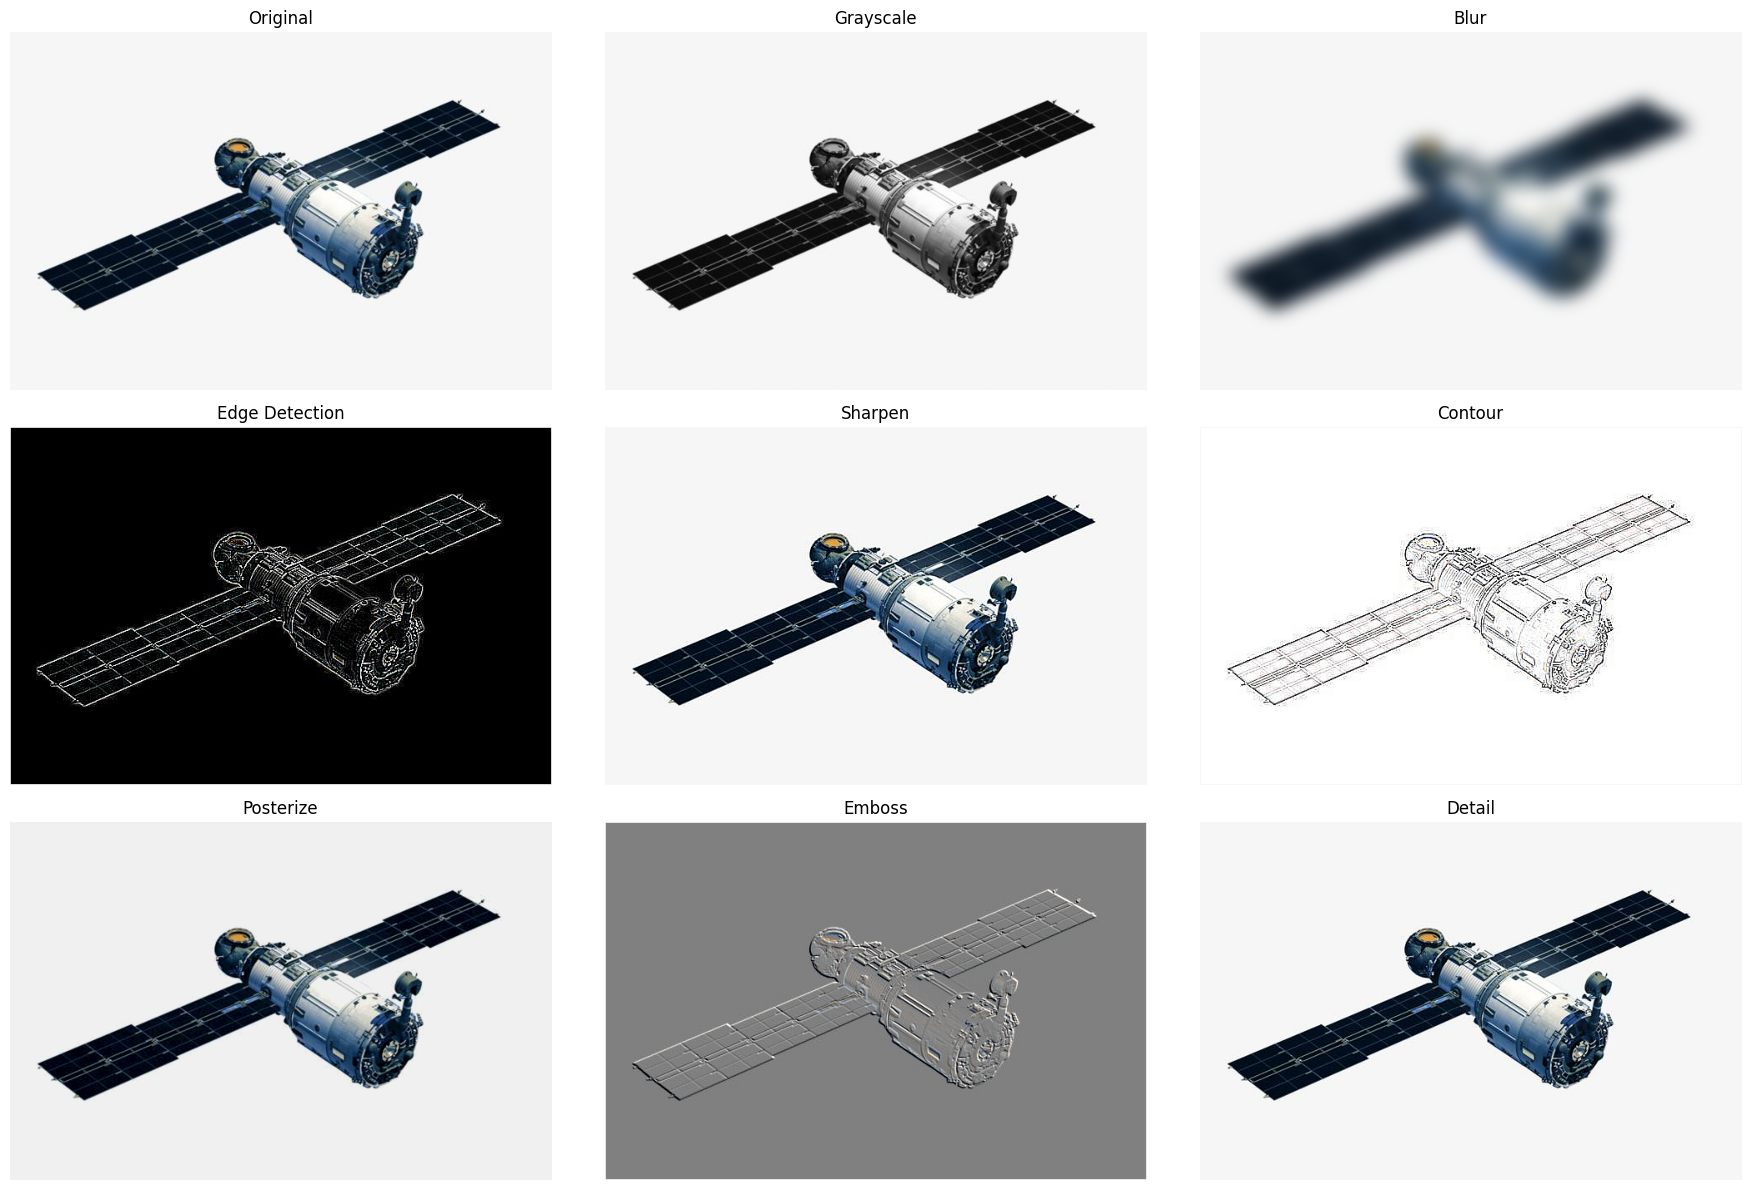

In [24]:
# Display the original and filtered images in a 3x3 grid
plt.figure(figsize=(18, 12))
for i, (name, img) in enumerate(filters.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray' if name == 'Grayscale' else None)
    plt.title(name)
    plt.axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show()

# 🧠 5min Challenge: Shape Extractor – Highlighting Geometric Features

🎯 Goal:
In this task, your objective is to extract geometric shapes or structural outlines from an image. You'll do this by applying a combination of filters.

How can I evaluate my filter? Let's use the Edge Contrast Ratio (ECR) metric!

🔼 ECR > 1.0 → The filter enhanced the edges — good job!

🔽 ECR < 1.0 → The filter weakened the edges

🔁 ECR ≈ 1.0 → The filter did not significantly change the edge strength

P.S: Remember to use Image_Filter_4.jpg for this experiment

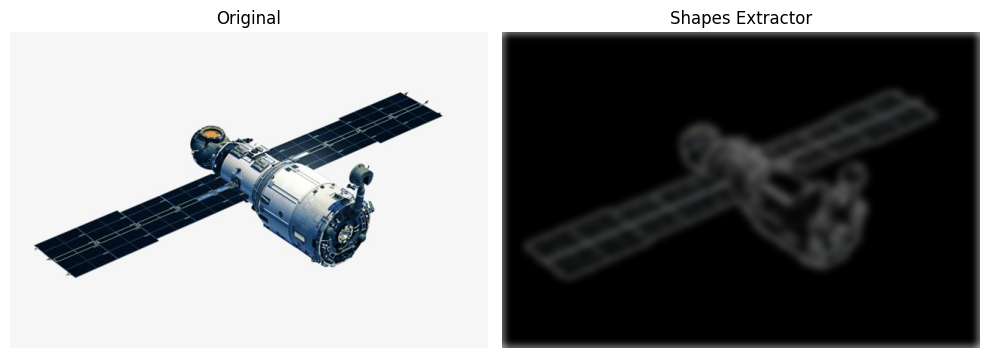

In [29]:
# Create a new filter combination
filters['My Shapes Extractor'] = image.filter(ImageFilter.FIND_EDGES).filter(ImageFilter.GaussianBlur(5))

# Display the result next to the original
plt.figure(figsize=(10, 5))

# Original
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

# Shape Extracted version
plt.subplot(1, 2, 2)
plt.imshow(filters['My Shapes Extractor'])
plt.title("My Shapes Extractor")
plt.axis('off')

plt.tight_layout()
plt.show()

def edge_strength(img):
    gray = ImageOps.grayscale(img)
    edges = gray.filter(ImageFilter.FIND_EDGES)
    return np.std(np.array(edges))  # Standard deviation as contrast metric

# ECR per la tua immagine
original_strength = edge_strength(image)
filtered_strength = edge_strength(filters['Shapes Extractor'])

ecr = filtered_strength / original_strength

print(f"Edge Contrast Ratio (ECR): {ecr:.2f}")
